In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import xgboost as xgb
import math
import csv
import seaborn as sns
%matplotlib inline

In [21]:
location = 'A'
#location = 'B'
#location = 'C'  
observed = True

if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [22]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
12,direct_rad_1h:J,0.362685
11,direct_rad:W,0.358962
13,effective_cloud_cover:p,-0.325929
40,total_cloud_cover:p,-0.280998
41,visibility:m,0.258690
29,relative_humidity_1000hPa:p,-0.209124
38,super_cooled_liquid_water:kgm2,-0.195630
2,ceiling_height_agl:m,0.185124
37,sun_elevation:d,0.182524
5,cloud_base_agl:m,0.178856


In [23]:
location = 'B'
observed = True
if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [24]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
11,direct_rad:W,0.233218
12,direct_rad_1h:J,0.229888
37,sun_elevation:d,0.171454
13,effective_cloud_cover:p,-0.166713
3,clear_sky_energy_1h:J,0.153714
4,clear_sky_rad:W,0.150085
41,visibility:m,0.137576
29,relative_humidity_1000hPa:p,-0.133272
40,total_cloud_cover:p,-0.133161
5,cloud_base_agl:m,0.131772


In [25]:
location = 'C'  
observed = True

if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [26]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
12,direct_rad_1h:J,0.288841
11,direct_rad:W,0.285508
13,effective_cloud_cover:p,-0.233356
37,sun_elevation:d,0.215204
4,clear_sky_rad:W,0.210782
3,clear_sky_energy_1h:J,0.209693
41,visibility:m,0.203009
40,total_cloud_cover:p,-0.192287
29,relative_humidity_1000hPa:p,-0.170591
2,ceiling_height_agl:m,0.161959


In [34]:
train_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/train_targets.parquet')
train_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/train_targets.parquet')
train_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_test_estimated.parquet')
X_train_estimated_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_test_estimated.parquet')
X_train_estimated_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_test_estimated.parquet')

X_train_observed_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_train_observed.parquet')

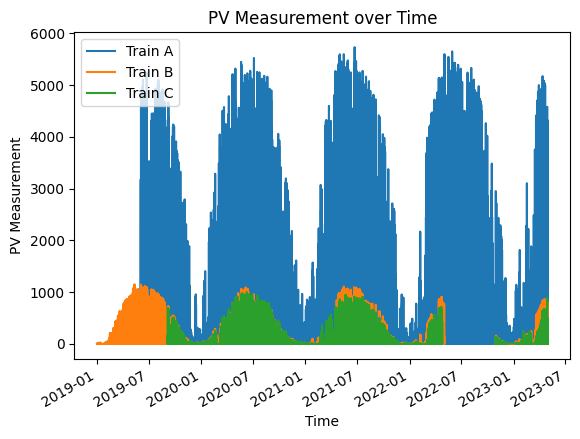

In [35]:
fig, ax = plt.subplots()

train_a.plot(x='time', y='pv_measurement', ax=ax, label='Train A')
train_b.plot(x='time', y='pv_measurement', ax=ax, label='Train B')
train_c.plot(x='time', y='pv_measurement', ax=ax, label='Train C')

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time')
ax.legend()

plt.show()

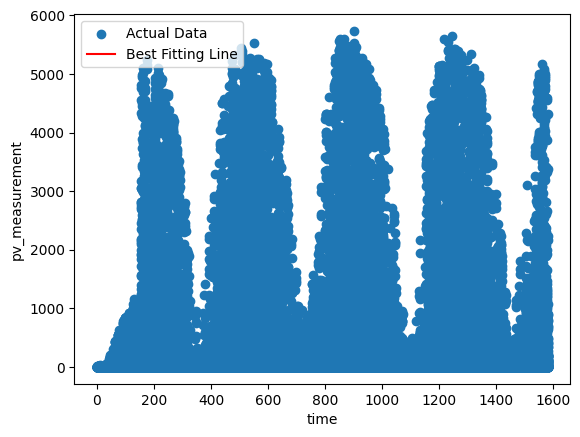

In [52]:
combined_data = pd.concat([train_a, train_b, train_c], ignore_index=True)

combined_data['time'] = pd.to_datetime(combined_data['time'])
start_date = combined_data['time'].min()
combined_data['days_since_start'] = (combined_data['time'] - start_date).dt.days

X = combined_data['days_since_start'].values
y = combined_data['pv_measurement'].values

# Using numpy's polyfit with a degree of 1 (linear regression)
slope, intercept = np.polyfit(X, y, 1)
y_pred = slope * X + intercept

# Plot the actual data and the best fitting line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Best Fitting Line')
plt.xlabel('time')
plt.ylabel('pv_measurement')
plt.legend()
plt.show()


In [56]:
train_a.columns

Index(['time', 'pv_measurement'], dtype='object')

In [57]:
X_train_observed_a.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [58]:
X_train_estimated_a.columns

Index(['date_calc', 'date_forecast', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_spe

In [60]:
df_corr = X_train_observed_a[X_train_observed_a.columns].dropna().corr()
df_corr

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,1.000000,-0.364513,0.090276,0.209084,-0.043496,-0.033926,0.083571,NaN,-0.261636,0.010228,...,-0.009138,-0.013354,-0.447940,-0.216089,-0.118499,0.172299,-0.294924,-0.225484,-0.055966,NaN
absolute_humidity_2m:gm3,-0.364513,1.000000,-0.857602,0.056992,-0.068479,-0.087647,0.045658,NaN,0.978959,-0.129859,...,0.110534,-0.008362,0.496380,0.927333,0.569043,-0.273296,0.593597,0.543985,0.083139,NaN
air_density_2m:kgm3,0.090276,-0.857602,1.000000,-0.295245,-0.001294,0.018155,-0.250209,NaN,-0.914147,0.034172,...,-0.144746,-0.074777,-0.320810,-0.922261,-0.661516,0.002749,-0.568964,-0.372714,-0.119160,NaN
ceiling_height_agl:m,0.209084,0.056992,-0.295245,1.000000,0.152044,0.162010,0.803713,NaN,0.143392,0.191918,...,0.027230,0.188215,-0.237284,0.284946,0.453997,0.571267,0.227954,-0.201776,0.139240,NaN
clear_sky_energy_1h:J,-0.043496,-0.068479,-0.001294,0.152044,1.000000,0.976943,0.178664,NaN,-0.054996,0.936038,...,0.049636,0.618790,0.010064,-0.066191,0.028155,0.348868,-0.017996,-0.077742,-0.041048,NaN
clear_sky_rad:W,-0.033926,-0.087647,0.018155,0.162010,0.976943,1.000000,0.183649,NaN,-0.076697,0.963081,...,0.018215,0.627164,-0.014068,-0.082229,0.014745,0.335884,-0.012425,-0.088657,-0.042667,NaN
cloud_base_agl:m,0.083571,0.045658,-0.250209,0.803713,0.178664,0.183649,1.000000,NaN,0.112581,0.227539,...,-0.021689,0.204942,-0.166413,0.242841,0.383005,0.542974,0.178168,-0.209517,0.041064,NaN
dew_or_rime:idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dew_point_2m:K,-0.261636,0.978959,-0.914147,0.143392,-0.054996,-0.076697,0.112581,NaN,1.000000,-0.111986,...,0.133352,-0.001497,0.443116,0.951811,0.616784,-0.172694,0.609054,0.516385,0.095252,NaN
diffuse_rad:W,0.010228,-0.129859,0.034172,0.191918,0.936038,0.963081,0.227539,NaN,-0.111986,1.000000,...,0.014266,0.637980,-0.103832,-0.111261,0.021965,0.380820,-0.036024,-0.096230,-0.026156,NaN
